### MNIST Image Classification on Sign Language
* In this project I am using MNIST dataset of hand made sign language images to classify each image into a class of 26 alphabets from A-Z.
* KAGGLE LINK: https://www.kaggle.com/datamunge/sign-language-mnist

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist_train = pd.read_csv("sign_datasets/sign_mnist_train.csv")
mnist_test = pd.read_csv("sign_datasets/sign_mnist_test.csv")

In [3]:
print(mnist_train.shape, mnist_test.shape)

(27455, 785) (7172, 785)


In [4]:
mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
mnist_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
print(mnist_train.isna().sum().sum(), mnist_test.isna().sum().sum())
# Data is completely clean without any missing values.

0 0


In [7]:
mnist_train_data = mnist_train.loc[:, "pixel1":]
mnist_train_label = mnist_train.loc[:, "label"]

mnist_test_data = mnist_test.loc[:, "pixel1":]
mnist_test_label = mnist_test.loc[:, "label"]

In [8]:
# Data Normalization
mnist_train_data = mnist_train_data/255.0
mnist_test_data = mnist_test_data/255.0

### Data Visualization

In [9]:
np.array(mnist_train_data)

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

IMAGE LABEL: 2


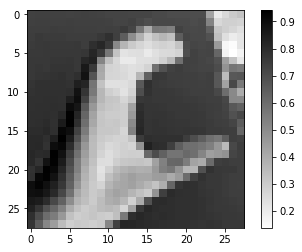

In [10]:
data_array = np.array(mnist_train_data.loc[2, :])
shaped_data = np.reshape(data_array, (28, 28))
sign_img = plt.imshow(shaped_data, cmap=plt.cm.binary)
plt.colorbar(sign_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[2, "label"]))
plt.show()

[1126, 1010, 1144, 1196, 957, 1204, 1090, 1013, 1162, 1114, 1241, 1055, 1151, 1196, 1088, 1279, 1294, 1199, 1186, 1161, 1082, 1225, 1164, 1118]


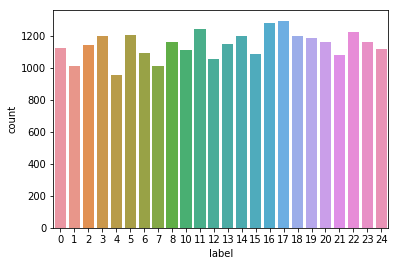

In [11]:
sns.countplot(mnist_train.label)
print(list(mnist_train.label.value_counts().sort_index()))

### Training model

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(256, "relu"),
    keras.layers.Dense(26, activation="softmax")
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
model.fit(mnist_test_data, mnist_test_label, shuffle=True, batch_size=500, epochs=50)

Train on 7172 samples
Epoch 1/50
7172/7172 [==============================] - 0s 40us/sample - loss: 3.0286 - acc: 0.1686
Epoch 2/50
7172/7172 [==============================] - 0s 29us/sample - loss: 2.5877 - acc: 0.3277
Epoch 3/50
7172/7172 [==============================] - 0s 23us/sample - loss: 2.2694 - acc: 0.4200
Epoch 4/50
7172/7172 [==============================] - 0s 29us/sample - loss: 2.0058 - acc: 0.4974
Epoch 5/50
7172/7172 [==============================] - 0s 27us/sample - loss: 1.7776 - acc: 0.5764
Epoch 6/50
7172/7172 [==============================] - 0s 23us/sample - loss: 1.6081 - acc: 0.6288
Epoch 7/50
7172/7172 [==============================] - 0s 23us/sample - loss: 1.4641 - acc: 0.6594
Epoch 8/50
7172/7172 [==============================] - 0s 23us/sample - loss: 1.3377 - acc: 0.7012
Epoch 9/50
7172/7172 [==============================] - 0s 23us/sample - loss: 1.2362 - acc: 0.7271
Epoch 10/50
7172/7172 [==============================] - 0s 23us/sample - loss

In [16]:
vc_loss, vc_accuracy = model.evaluate(mnist_test_data, mnist_test_label)
print("\nLOSS: {}\nACCURACY: {}".format(vc_loss, vc_accuracy))

7172/7172 [==============================] - 0s 39us/sample - loss: 0.0929 - acc: 0.9999

LOSS: 0.0928997958854996
ACCURACY: 0.9998605847358704


### Final Result
* LOSS: 9%
* ACCURACY: 99.9%